In [362]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading Data**

In [363]:
# reading data into variable bike
bike=pd.read_csv("day.csv")

## **Initial Understanding of data**

In [364]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [365]:
# Checking shape of data
bike.shape

(730, 16)

In [366]:
# observing summary of data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [367]:
# Checking for missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**There is no missing value in the data**

In [368]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Exploratory Data Analysis(EDA)

### Mapping non-binary categorical columns with values given in data dictionary

In [369]:
# Checking no. of unique values
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**We can observe that non-binary categorical columns are season, mnth, weekday, weathersit**

In [370]:
# Converting season column to strings
# Here 1 = spring, 2=summer, 3=fall, 4=winter
bike["season"] = bike["season"].map({1: "season_1_spring", 2: "season_2_summer", 3: "season_3_fall", 4: "season_4_winter"})

# Converting weathersit column to strings
# 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
# 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike["weathersit"] = bike["weathersit"].map({1: "weather_1_clear", 2: "weather_2_mist", 3: "weather_3_lightsnow", 4: "weather_4_heavyrain"})

# Converting mnth column to strings
# month_1=Jan, month_2=Feb, month_3=march, month_4=april, month_5=may, month_6= june, month_7= july, month_8=aug, month_9=sept, month_10=oct, month_11=nov, month_12=dec  
bike["mnth"]=bike["mnth"].map({1: 'month_1',2: "month_2",3: 'month_3',4: 'month_4',5: 'month_5',6: 'month_6',7: 'month_7',8: 'month_8',9: 'month_9',10: 'month_10',11: 'month_11',12: 'month_12'})

# Converting workingday to orignal values as per data dictionary
# 1=Sunday,2=Monday,3=Tuesday,4=Wednesday, 5=Thursday, 6=Friday, 7=Saturday
bike["weekday"]=bike["weekday"].map({0: 'weekday_1_sun',1: 'weekday_2_mon',2: 'weekday_3_tue',3: 'weekday_4_wed',4: 'weekday_5_thur',5: 'weekday_6_fri',6: 'weekday_7_sat'})

### dropping irrelevant and redundant columns

In [371]:
# Dropping inststant column as its record index and will not contribute in model building
bike.drop("instant",axis=1,inplace= True)

In [372]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,season_1_spring,0,month_1,0,weekday_2_mon,1,weather_2_mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,season_1_spring,0,month_1,0,weekday_3_tue,1,weather_2_mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,season_1_spring,0,month_1,0,weekday_4_wed,1,weather_1_clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,season_1_spring,0,month_1,0,weekday_5_thur,1,weather_1_clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,season_1_spring,0,month_1,0,weekday_6_fri,1,weather_1_clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [373]:
# Dropping dteday column as its a redundant column as all information provided by it(day,month,year) are already provided by other columns
bike.drop("dteday",axis=1,inplace= True)

In [374]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,season_1_spring,0,month_1,0,weekday_2_mon,1,weather_2_mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,season_1_spring,0,month_1,0,weekday_3_tue,1,weather_2_mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,season_1_spring,0,month_1,0,weekday_4_wed,1,weather_1_clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,season_1_spring,0,month_1,0,weekday_5_thur,1,weather_1_clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,season_1_spring,0,month_1,0,weekday_6_fri,1,weather_1_clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [375]:
# Dropping casual and registered columns as they are redundant and their sum is provided by cnt column
bike.drop(["casual","registered"],axis=1,inplace= True)

In [376]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,season_1_spring,0,month_1,0,weekday_2_mon,1,weather_2_mist,14.110847,18.18125,80.5833,10.749882,985
1,season_1_spring,0,month_1,0,weekday_3_tue,1,weather_2_mist,14.902598,17.68695,69.6087,16.652113,801
2,season_1_spring,0,month_1,0,weekday_4_wed,1,weather_1_clear,8.050924,9.47025,43.7273,16.636703,1349
3,season_1_spring,0,month_1,0,weekday_5_thur,1,weather_1_clear,8.200000,10.60610,59.0435,10.739832,1562
4,season_1_spring,0,month_1,0,weekday_6_fri,1,weather_1_clear,9.305237,11.46350,43.6957,12.522300,1600


In [377]:
# Bifurcating variables into categorical and numerical columns
categ_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_cols=["temp","atemp","hum","windspeed"]
target=["cnt"]
print(bike.shape[1])
print(len(categ_cols)+len(num_cols)+len(target))

12
12


## Outlier Check

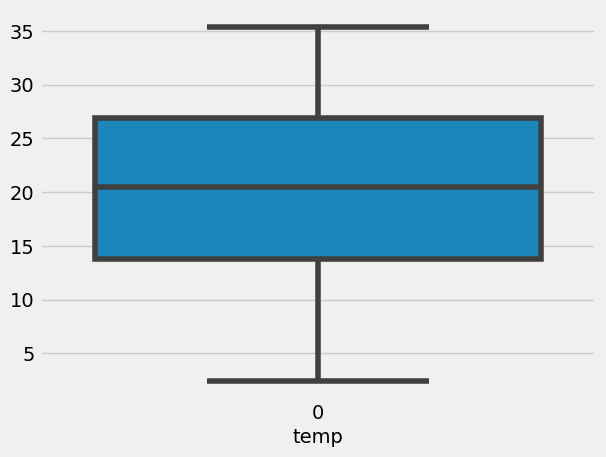

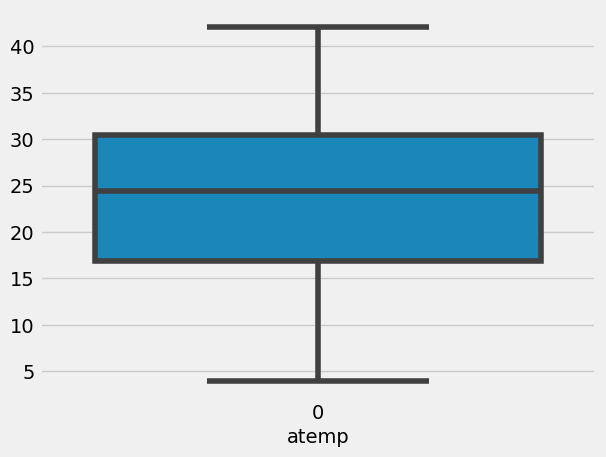

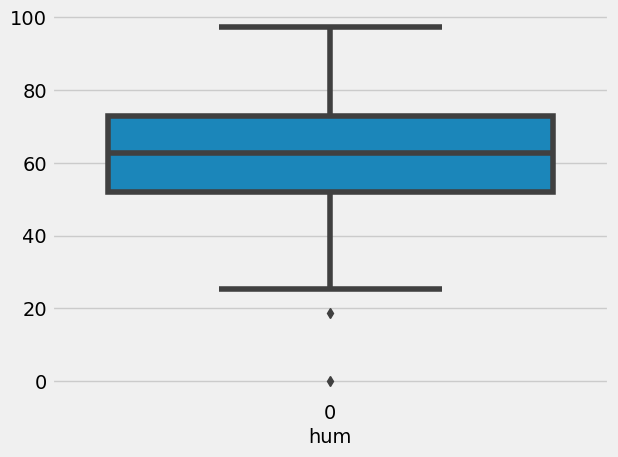

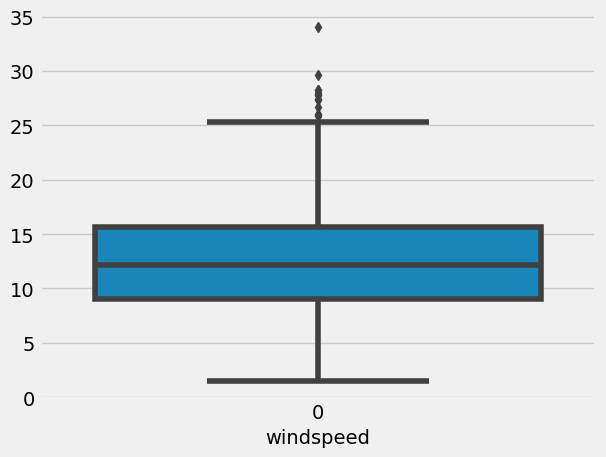

In [378]:
for i in num_cols:
    sns.boxplot(bike[i])
    plt.xlabel(i)
    plt.show()

**From above box plots of numerical columns, there seem to be no potential outliers in data**

### Univariate analysis

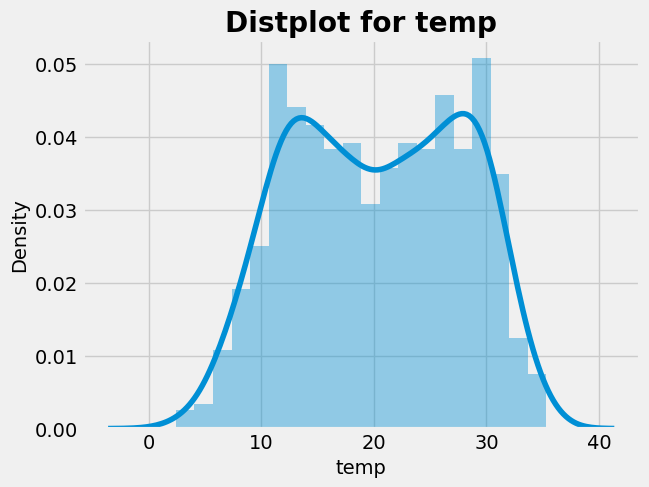

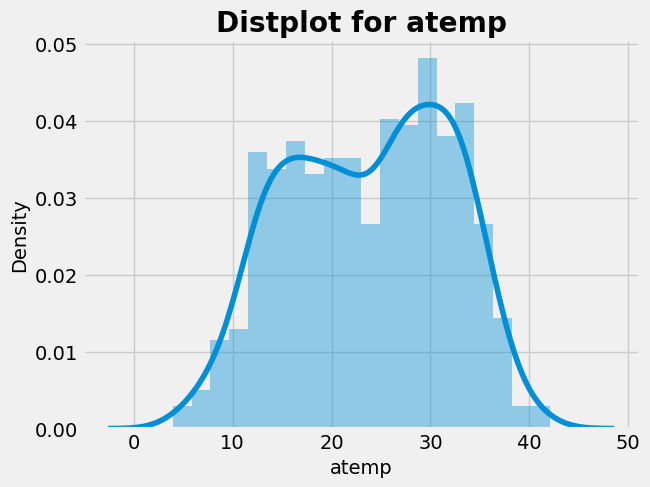

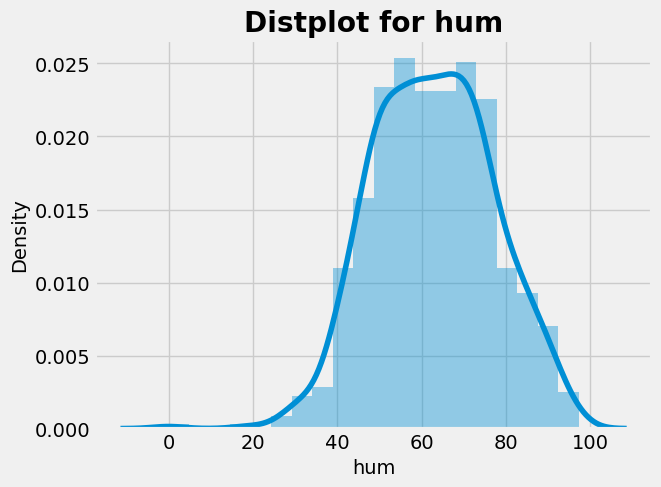

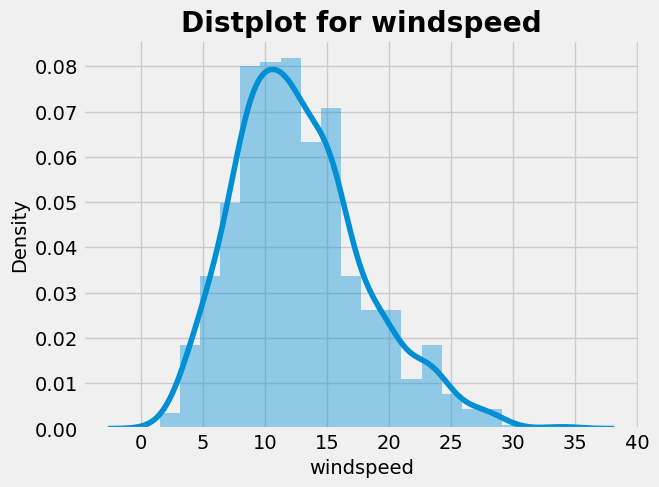

In [379]:
# Univariate analysis of contineous columns
for i in num_cols:
    plt.style.use("fivethirtyeight")
    sns.distplot(bike[i], bins=20)
    plt.xlabel(i)
    plt.title("Distplot for" +" "+i, fontweight="heavy")
    
    plt.show()

**From above plots, following inferences can be made**
1. temp has max. density at 30 (approx.)
2. hum has max. density at 50 (approx.)
3. windspeed has max. density at 11(approx.)

season


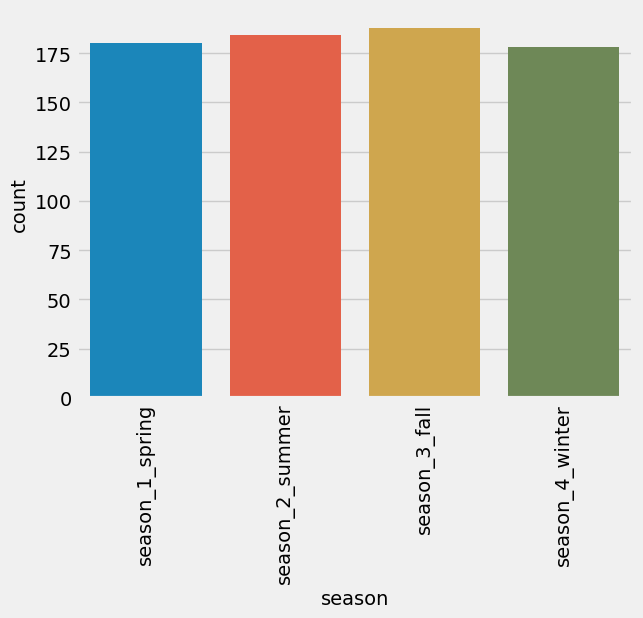

yr


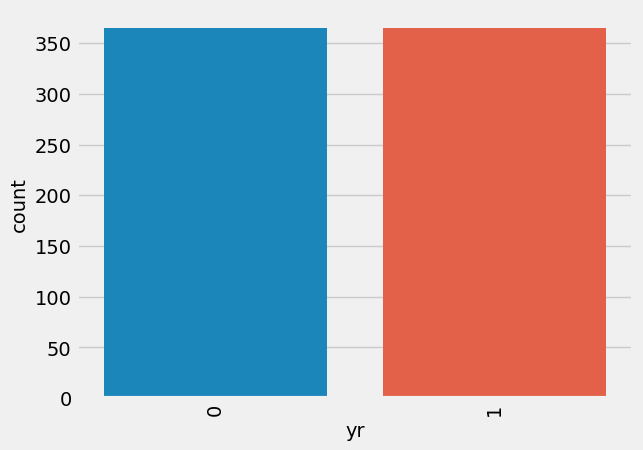

mnth


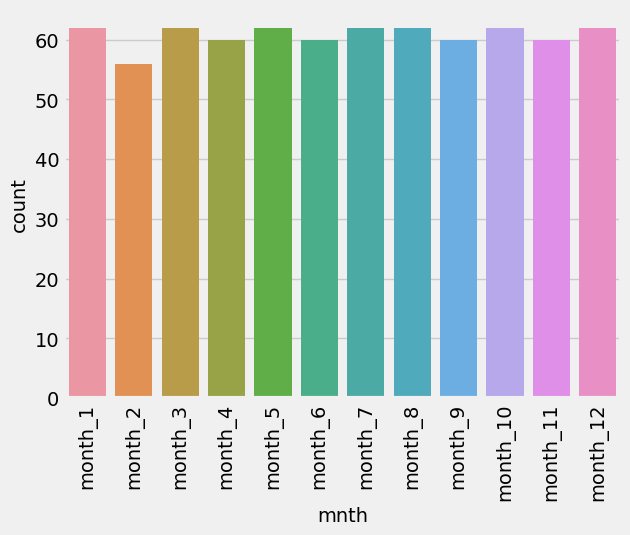

holiday


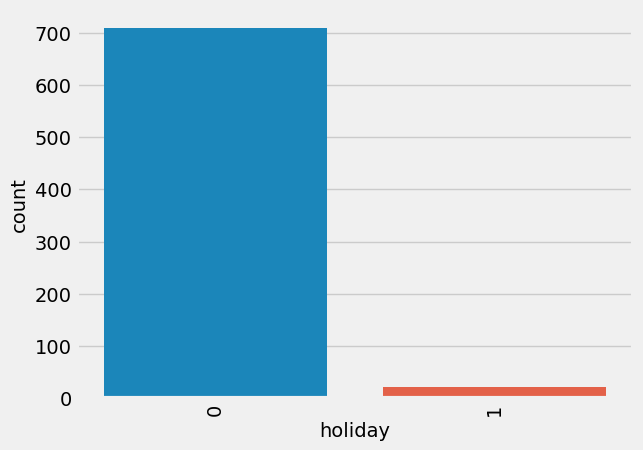

weekday


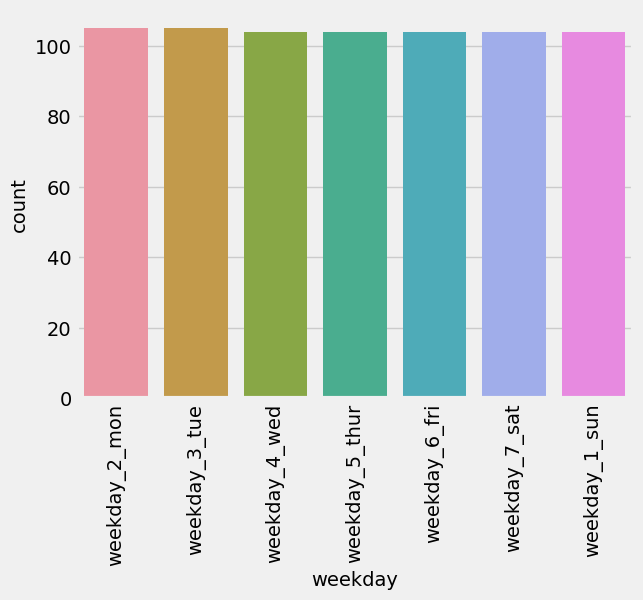

workingday


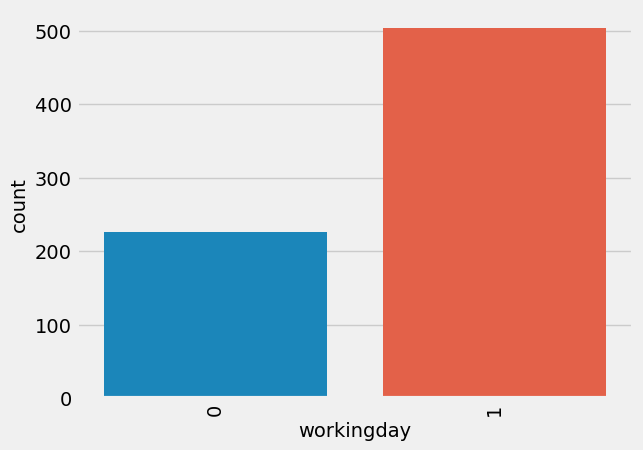

weathersit


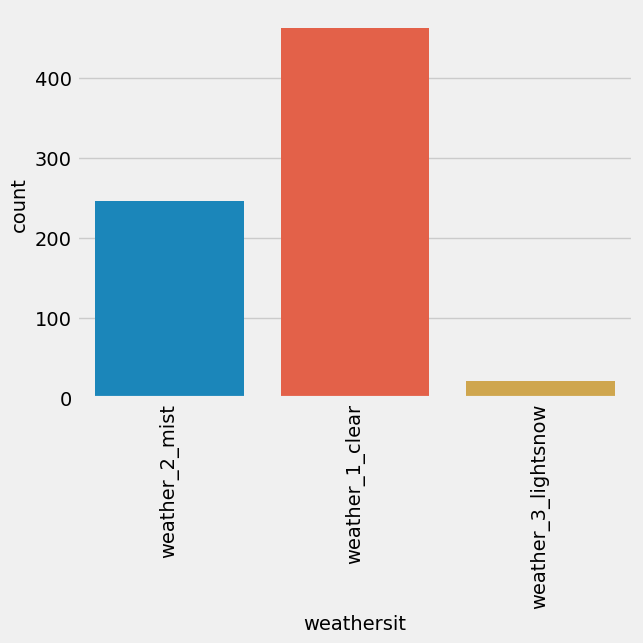

In [380]:
# Univariate analysis of categorical columns
for i in categ_cols:
    print("\033[1m" + i + "\033[0m")
    sns.countplot(x=bike[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

**From above plots, following inferences can be made:**
1. The season distribution seems to be equal distribution and no major observation is noted
2. Most of the days are Non-holidays
3. Most of the days are working days
4. Weathersit 1 or clear weather has highest count amongst the weathersit

## Bivariate Analysis 

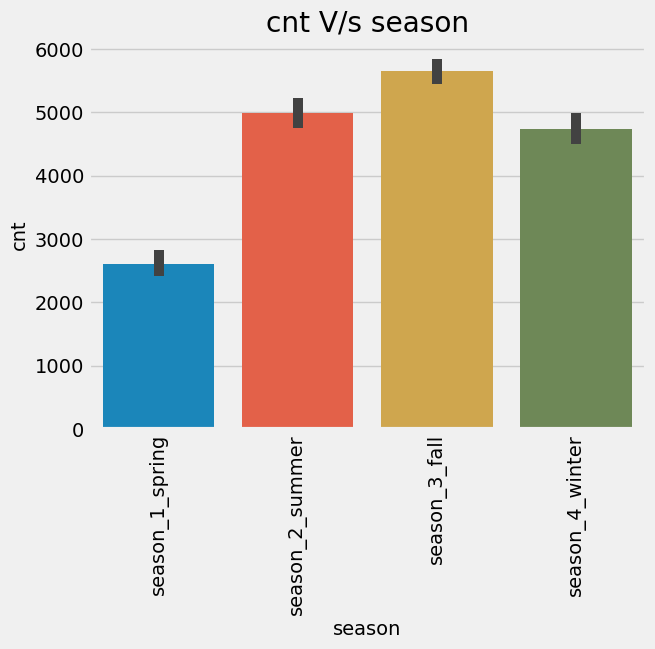

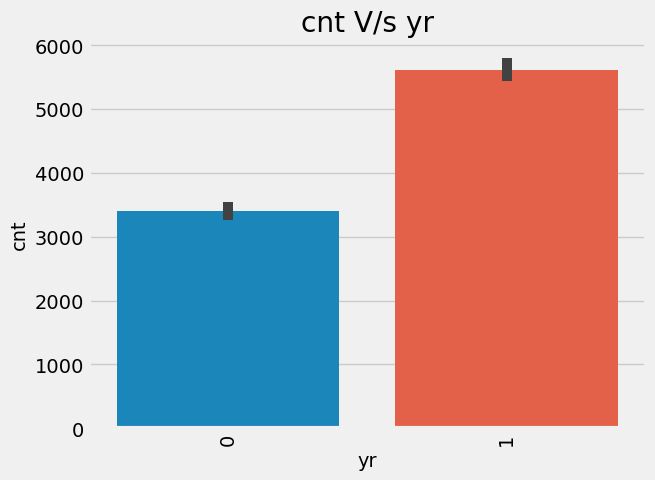

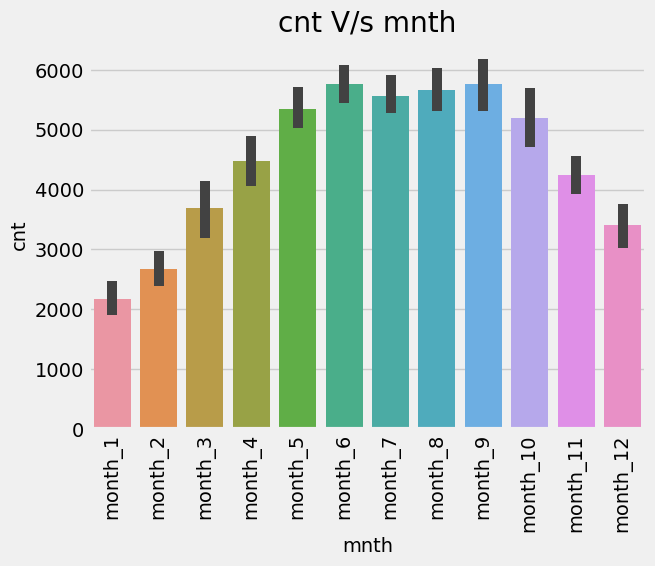

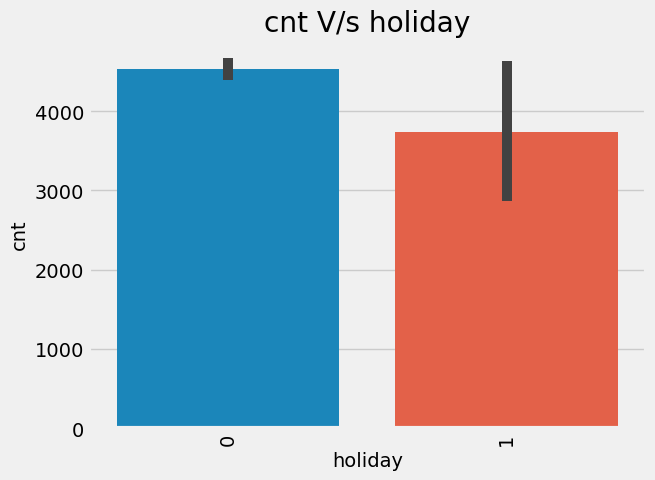

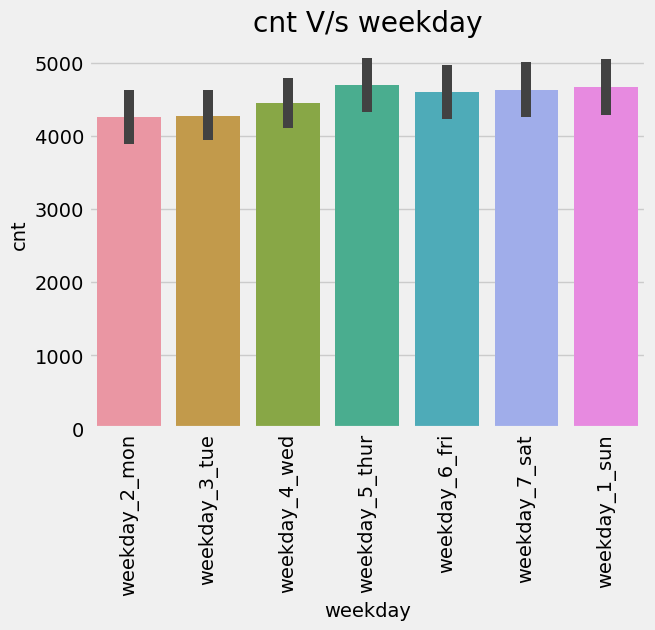

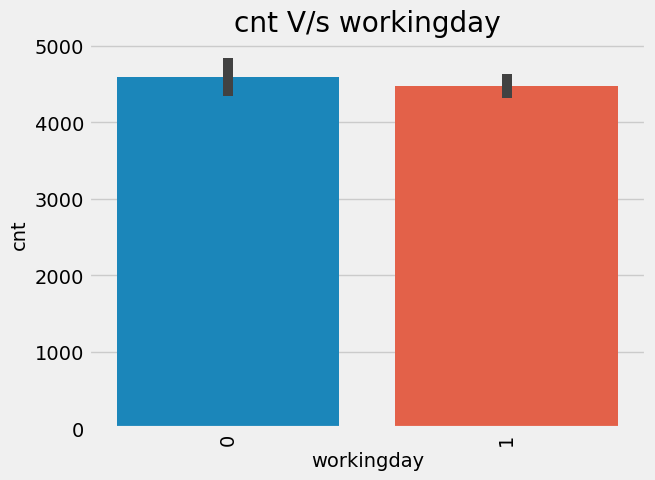

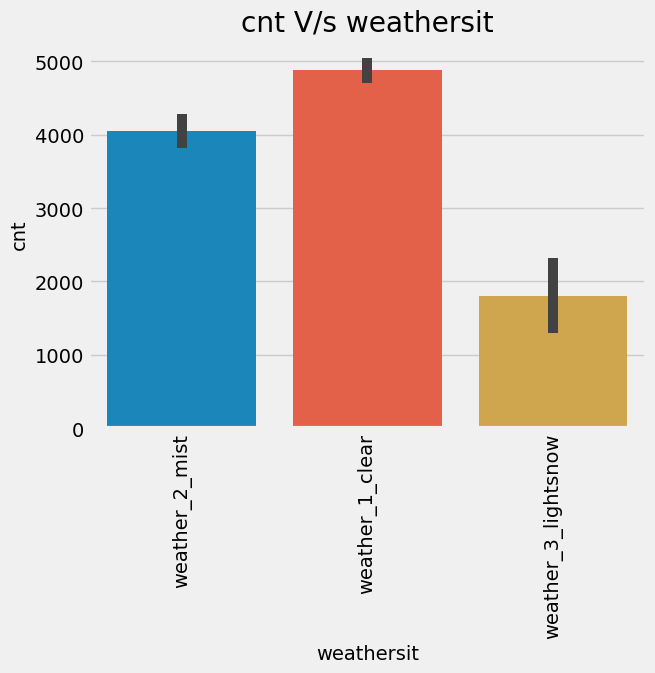

In [338]:
# bivariate analysis of categorical columns against the target variable cnt
for i in categ_cols:
    sns.barplot(x=bike[i],y=bike["cnt"])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.title("cnt V/s"+ " " + i)
    plt.show()

**From above plots, following inferences can be made:**
1. More no. of bikes are hired in season 3/fall
2. More no. of bikes are hired in year 1 i.e.2019
3. Most no. of bikes are hired from month 5 and 10 i.e. may to october
4. More no. of bikes are hired on non-holidays.
5. More no. of bikes are hired on thursday and sunday
6. More no. of bikes are hired on a non-working day
7. More no. of bikes are hired in weathersit 1 i.e. Clear, Few clouds, Partly cloudy, Partly cloudy weather.

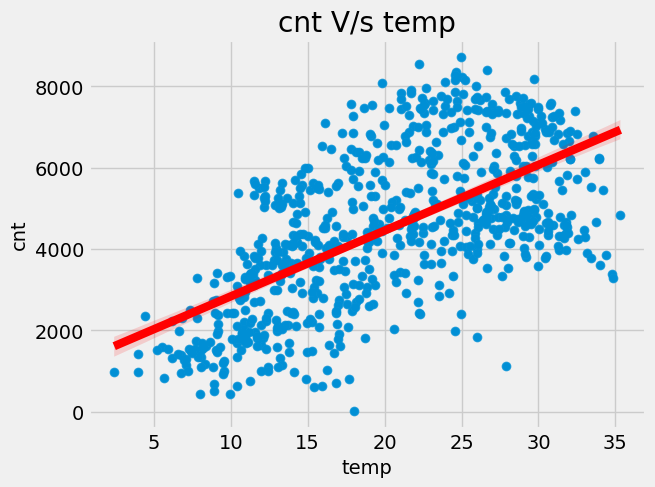

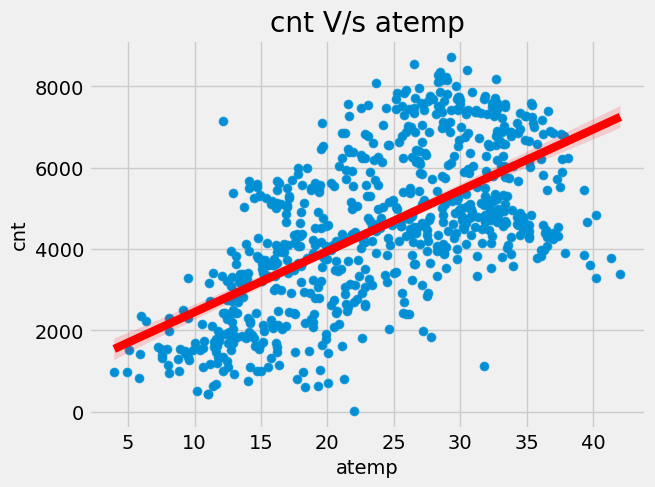

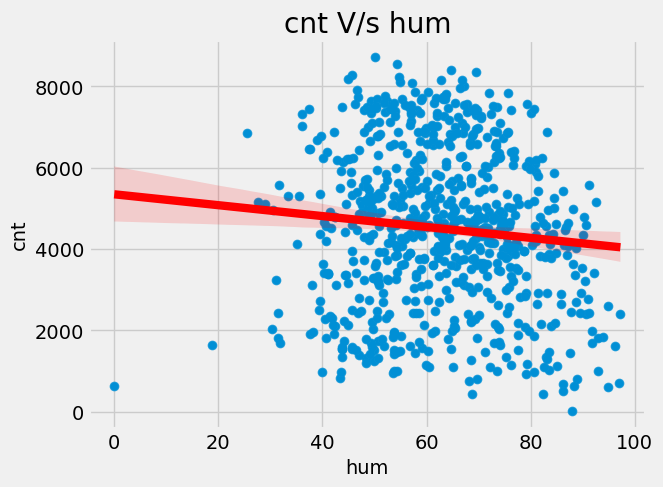

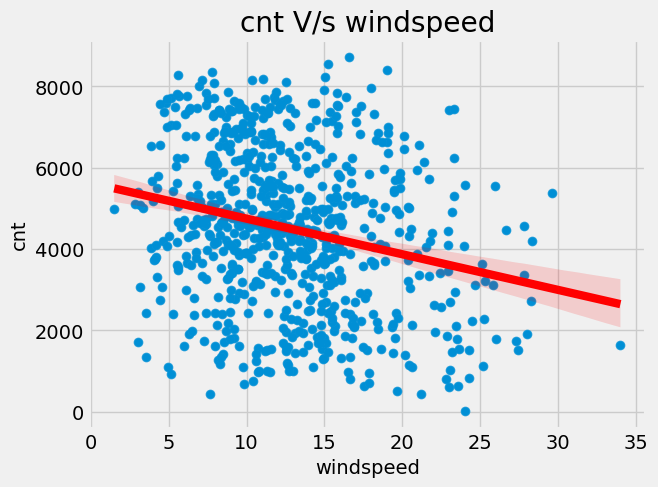

In [381]:
# bivariate analysis of cont columns against the target variable cnt
for i in num_cols:
    sns.scatterplot(x=bike[i],y=bike["cnt"])
    sns.regplot(x=bike[i],y=bike["cnt"], fit_reg=True, line_kws={"color":"Red"})
    plt.title("cnt V/s"+ " " + i)
    plt.xlabel(i)
    plt.show()

**From above plots, following inferences can be made:**
1. Count of bikes hired in response to temperature show an increasing trend 
2. Count of bikes hired in response to atemp seem to be follow same trend as temp.
3. Most no. of bikes seem to be hired in humidity range of 40 to 80. Also there seems to be a downward trend with cnt.
4. Most no. of bikes seem to be hired in windspeed range of 5 to 20. Also there seems to be a downward trend with cnt.

**From above scatter plots we can observe linear relationship between dependent variable(cnt) and independent variables, hence the assumption of linearity between dependent and independent variables of linear regression is verified**

## Bivariate analysis of Numerical Columns

<Figure size 3000x2000 with 0 Axes>

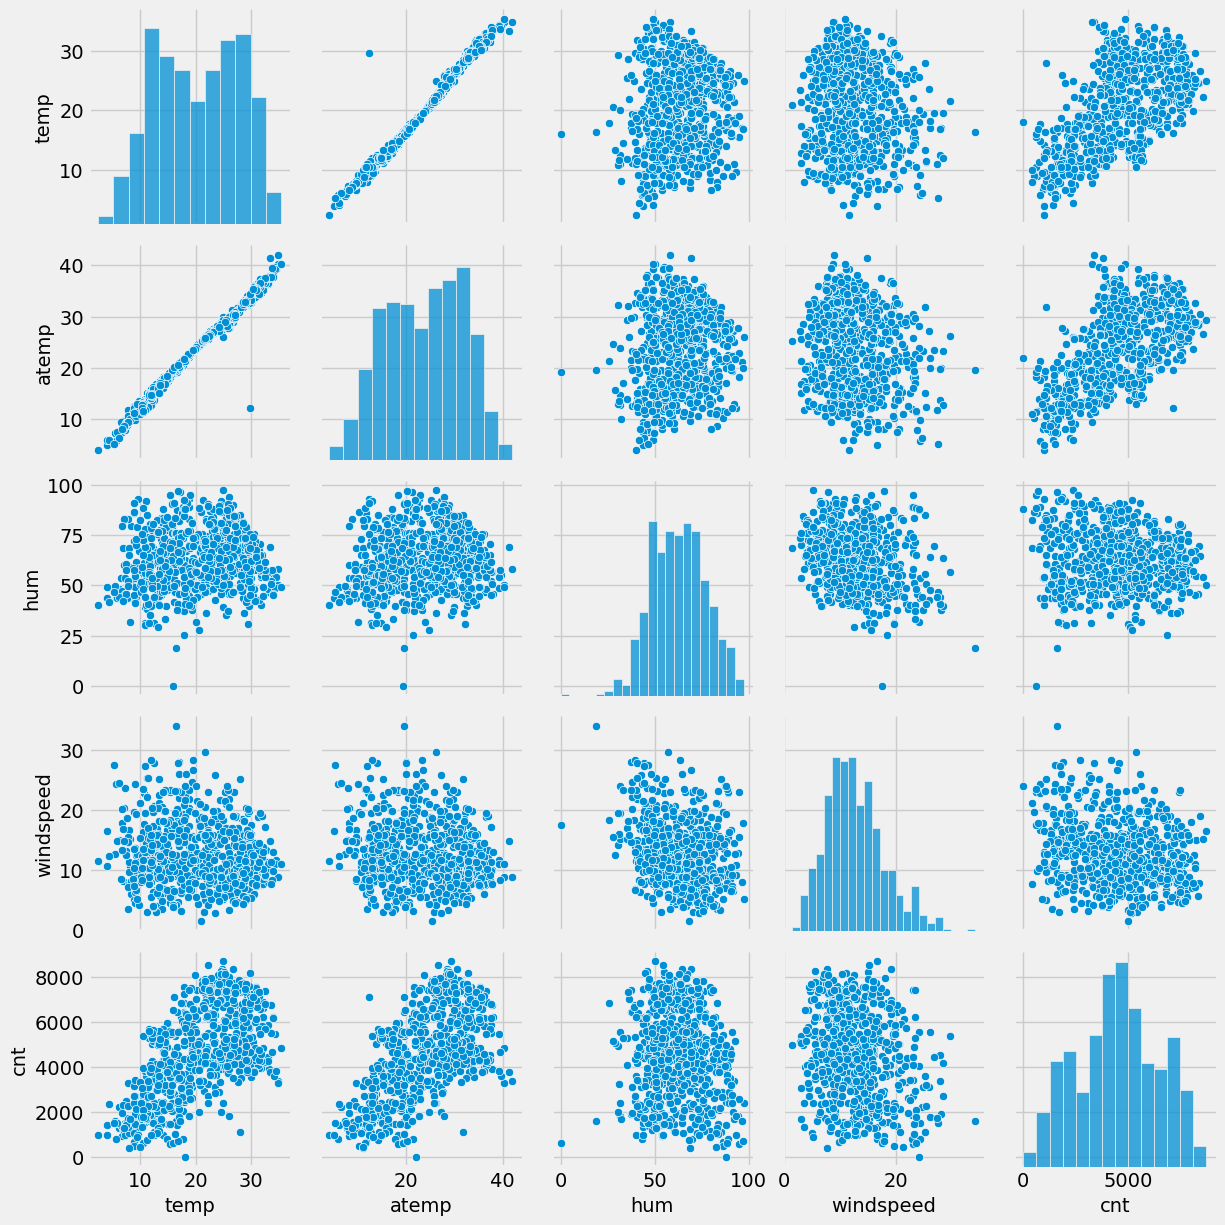

In [382]:
plt.figure(figsize=(30,20))
sns.pairplot(bike[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

**From above plots it can be seen that**
1. temp and atemp seem to have a linear relation.
2. temp and hum as a slight possitive relation
3. temp and windspeed show negative relation
4. hum and windspeed show slight negative relation

## Multivariate analysis

<Axes: >

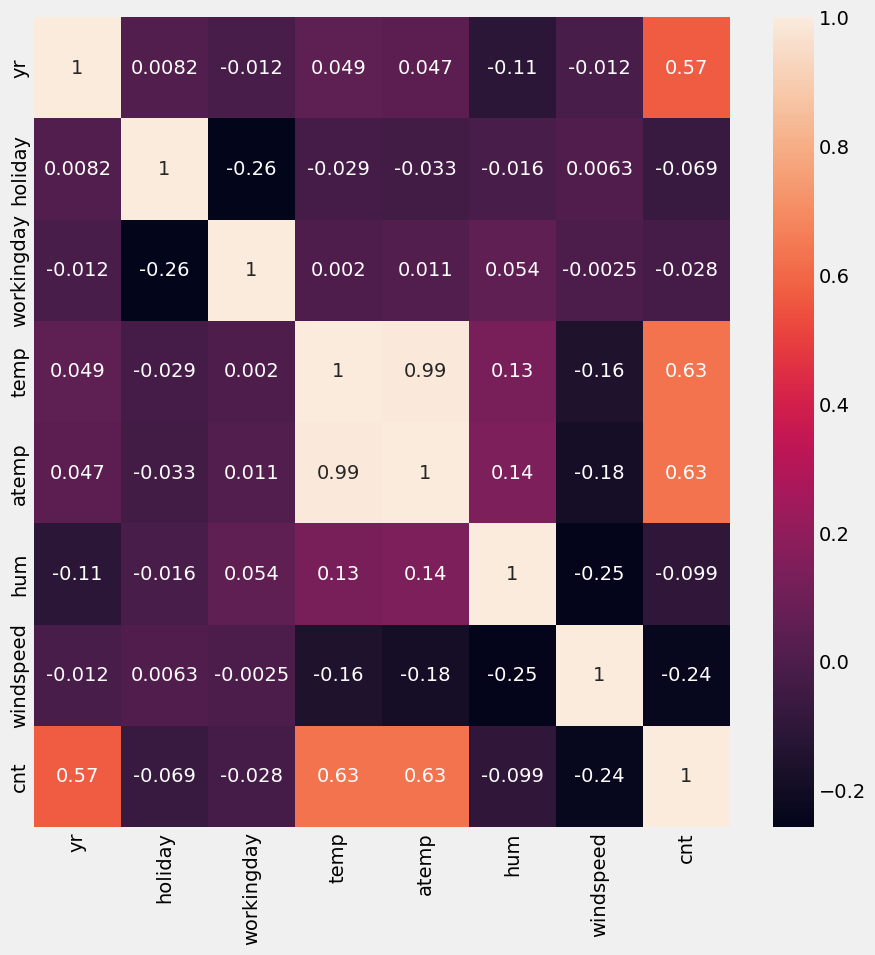

In [393]:
plt.figure(figsize=(10,10))
sns.heatmap(bike.corr(),annot=True)

**Clearly there is a linear relationship between temp and atemp as their correlation coefficient is 0.99 which is very high. Both parameters cannot be used together as they will cause multicolinearity. We will decide which parameters to keep and which to drop based on VIF and p-value w.r.t other variables also**

## Pre-processing Data

### Converting non-binary categorical columns to their orignal values as per data dictionary provided

In [394]:
# Creating dummy variables for season column
season = pd.get_dummies(bike['season'],drop_first = True)
# Creating dummy variables for  weathersit column
weathersit = pd.get_dummies(bike['weathersit'], drop_first = True)
# Creating dummy variables for mnth column
mnth = pd.get_dummies(bike['mnth'], drop_first = True)
# Creating dummy variables for weekday column
weekday = pd.get_dummies(bike['weekday'], drop_first = True)

In [395]:
# Concating the dummy variables
bike = pd.concat([bike,season,weathersit,mnth,weekday], axis = 1)

In [396]:
# Dropping the season,weathersit,mnth,weekday column
bike.drop(["season","weathersit","mnth","weekday"],axis=1,inplace=True)

In [397]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2_summer', 'season_3_fall', 'season_4_winter',
       'weather_2_mist', 'weather_3_lightsnow', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'weekday_2_mon', 'weekday_3_tue',
       'weekday_4_wed', 'weekday_5_thur', 'weekday_6_fri', 'weekday_7_sat'],
      dtype='object')

## Splitting the Data into Training and Testing Sets

In [398]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7,test_size=0.3, random_state = 100)

## Rescaling

### Rescaling train dataset

In [399]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
scaler = MinMaxScaler()

In [401]:
num_cols_scale=["temp","hum","atemp","windspeed","cnt"]
bike_train[num_cols_scale] = scaler.fit_transform(bike_train[num_cols_scale])

In [402]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2_summer,season_3_fall,...,month_6,month_7,month_8,month_9,weekday_2_mon,weekday_3_tue,weekday_4_wed,weekday_5_thur,weekday_6_fri,weekday_7_sat
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,1,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2_summer,season_3_fall,...,month_6,month_7,month_8,month_9,weekday_2_mon,weekday_3_tue,weekday_4_wed,weekday_5_thur,weekday_6_fri,weekday_7_sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.074510,0.076471,0.096078,0.080392,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.262857,0.266010,0.294988,0.272166,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing data into X and Y sets for the model building

In [404]:
y_train = bike_train.pop('cnt')
X_train = bike_train
print(X_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2_summer', 'season_3_fall', 'season_4_winter', 'weather_2_mist',
       'weather_3_lightsnow', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'weekday_2_mon', 'weekday_3_tue', 'weekday_4_wed',
       'weekday_5_thur', 'weekday_6_fri', 'weekday_7_sat'],
      dtype='object')


## Model Building

### Building model using statsmodel, for the detailed statistics

In [405]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [406]:

lm = LinearRegression()

# Specify the number of features we want to select
n_features_to_select = 15

rfe = RFE(estimator=lm, n_features_to_select=n_features_to_select)
rfe = rfe.fit(X_train, y_train)


In [407]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2_summer', True, 1),
 ('season_3_fall', True, 1),
 ('season_4_winter', True, 1),
 ('weather_2_mist', True, 1),
 ('weather_3_lightsnow', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 13),
 ('month_12', False, 14),
 ('month_2', False, 11),
 ('month_3', True, 1),
 ('month_4', False, 2),
 ('month_5', True, 1),
 ('month_6', False, 3),
 ('month_7', False, 12),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('weekday_2_mon', False, 9),
 ('weekday_3_tue', False, 10),
 ('weekday_4_wed', False, 8),
 ('weekday_5_thur', False, 6),
 ('weekday_6_fri', False, 7),
 ('weekday_7_sat', False, 15)]

In [408]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2_summer',
       'season_3_fall', 'season_4_winter', 'weather_2_mist',
       'weather_3_lightsnow', 'month_10', 'month_3', 'month_5', 'month_8',
       'month_9'],
      dtype='object')

In [409]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [410]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [411]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [412]:
# Observing the summary of linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.95e-189
Time:                        18:10:28   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2376    

In [413]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2_summer',
       'season_3_fall', 'season_4_winter', 'weather_2_mist',
       'weather_3_lightsnow', 'month_10', 'month_3', 'month_5', 'month_8',
       'month_9'],
      dtype='object')

In [414]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,season_3_fall,8.80
4,windspeed,3.80
5,season_2_summer,3.73
7,season_4_winter,3.13
8,weather_2_mist,2.15
0,yr,2.04
13,month_8,1.85
12,month_5,1.68


**Since month_5 has highest p-value more than 0.05 hence we need to drop it since it has become insignificant**

### Model 2

In [415]:
# Since hum has highest VIF>5, hence dropping it first
X_train_new = X_train_rfe.drop(["month_5"], axis = 1)

In [416]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new)

In [417]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [418]:
# Observing summary
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          9.02e-190
Time:                        18:11:39   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2321    

In [419]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.01
3,hum,15.51
6,season_3_fall,8.53
4,windspeed,3.73
5,season_2_summer,3.51
7,season_4_winter,3.07
8,weather_2_mist,2.15
0,yr,2.03
12,month_8,1.85
10,month_10,1.64


**Since p value of season_3_fall is > 0.05 hence we need to drop it since it has become insignificant**

## Model 3

In [420]:
# Since hum has highest VIF>5, hence dropping it first
X_train_new = X_train_new.drop(["season_3_fall"], axis = 1)

In [421]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new)

In [422]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [423]:
# Observing summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.26e-190
Time:                        18:12:54   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2324    

In [424]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
6,season_4_winter,2.34
7,weather_2_mist,2.14
0,yr,2.02
5,season_2_summer,1.83
9,month_10,1.61
11,month_8,1.61
12,month_9,1.34


**Since p value of month_3 is > 0.05  we need to drop it as it has become insignificant**

## Model 4

In [425]:
# Since hum has highest VIF>5, hence dropping it first
X_train_new = X_train_new.drop(["month_3"], axis = 1)

In [426]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new)

In [427]:
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

In [428]:
# Observing summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          6.02e-191
Time:                        18:13:40   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2390    

In [429]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,season_4_winter,2.27
7,weather_2_mist,2.13
0,yr,2.02
5,season_2_summer,1.83
9,month_10,1.61
10,month_8,1.60
11,month_9,1.34


**Since p-values of all variables are less than 0.05, we will check the VIF values, since VIF of hum is highest and >5, hence we need to drop it to avoid multicolinearity**

## Model 5

In [430]:
# Since hum has highest VIF>5, hence dropping it first
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [431]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_new)

In [432]:
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

In [433]:
# Observing summary
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          3.21e-187
Time:                        18:14:27   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1355    

In [434]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4_winter,1.95
4,season_2_summer,1.82
8,month_10,1.60
9,month_8,1.59
6,weather_2_mist,1.49
10,month_9,1.34
7,weather_3_lightsnow,1.09


**Since p value of month_10 is > 0.05  we need to drop it as it has become insignificant**

## model 6

In [435]:
# Since hum has highest VIF>5, hence dropping it first
X_train_new = X_train_new.drop(["month_10"], axis = 1)

In [436]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_new)

In [437]:
lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

In [438]:
# Observing summary
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.26e-187
Time:                        18:15:03   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1312    

In [439]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2_summer,1.81
8,month_8,1.58
5,season_4_winter,1.49
6,weather_2_mist,1.48
9,month_9,1.31
7,weather_3_lightsnow,1.08
1,holiday,1.04


**Since all p-values and VIF are under limit i.e. p-values<=0.05 and VIF<=5, this model will be our final model**

## Residual Analysis of the train data


In [440]:
y_train_cnt = lm6.predict(X_train_lm6)

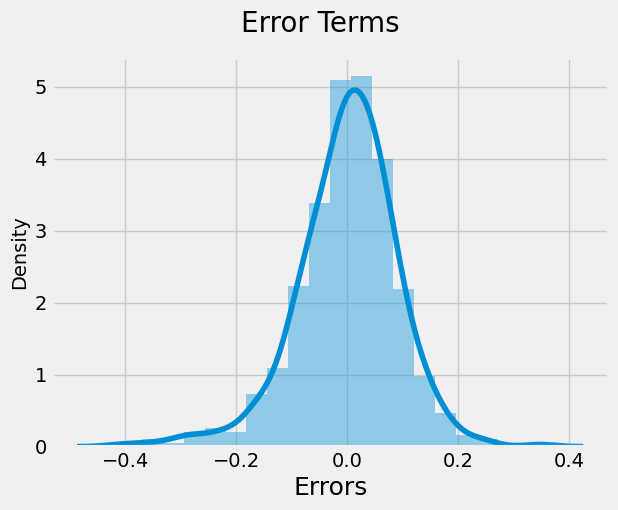

In [441]:
# Plot the distplot of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**Hence it is clear from above plot that errors are normally distributed and our assumption of normal distribution of errors  is correct**

In [442]:
# Durbin-watson test to detect autocorrelation
import statsmodels.api as sm
residuals = lm6.resid
dw_test = sm.stats.stattools.durbin_watson(residuals)
# Print the test statistic and conclusion
print(f"Durbin-Watson Test Statistic: {dw_test}")
if dw_test < 1.5:
    print("Positive autocorrelation may be present.")
elif dw_test > 2.5:
    print("Negative autocorrelation may be present.")
else:
    print("No significant autocorrelation detected.")

Durbin-Watson Test Statistic: 2.050620095461341
No significant autocorrelation detected.


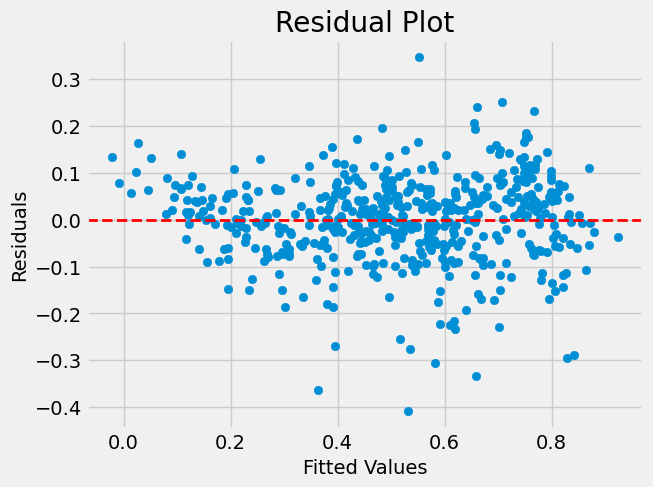

In [309]:
# Plotting residual plot
import matplotlib.pyplot as plt

residuals = y_train - y_train_cnt
fitted_values = y_train_cnt

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2) 
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

1. From above residual plot we do not observe any pattern amongst the error terms. Also from durbin-watson test we obtained the result of no autocorrelation. We can say that error terms are independent of each other 
2. There is a constant (approx) spread of residuals across the range of predicted values hence homoscedasticity is verified

**Since all assumptions of linear regression, linearity between dependend and independent variable (verified at EDA stage), normal distribution of errors, independence of error terms, homoscedasticity of the error are verified. The model is good to go with**

## Making Predictions

## Scaling Test data

In [443]:
num_cols=["temp","hum","atemp","windspeed","cnt"]

bike_test[num_cols] = scaler.transform(bike_test[num_cols])
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2_summer,season_3_fall,...,month_6,month_7,month_8,month_9,weekday_2_mon,weekday_3_tue,weekday_4_wed,weekday_5_thur,weekday_6_fri,weekday_7_sat
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,1,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,1,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.243430,0.708888,0.287411,0.336516,0,0,...,0,0,0,0,0,1,0,0,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0.495973,1,0,...,0,0,0,0,0,1,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing Test data into X_test and y_test

In [444]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2_summer,season_3_fall,...,month_6,month_7,month_8,month_9,weekday_2_mon,weekday_3_tue,weekday_4_wed,weekday_5_thur,weekday_6_fri,weekday_7_sat
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,1,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,1,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,1,0,0,0,0,0,0,0,0,1


In [445]:
y_test = bike_test.pop('cnt')
X_test = bike_test

## Prediction Step

In [446]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new_const = sm.add_constant(X_test_new)

In [447]:
# Making predictions
y_test_pred = lm6.predict(X_test_new_const)

## Model Evaluation

In [448]:
from sklearn.metrics import r2_score
import numpy as np

# Actual and predicted values
y_true = y_test
y_pred = y_test_pred

# Calculate the regular R-squared
r_squared = r2_score(y_true, y_pred)

# Number of samples (n) and number of predictor variables (p)
n = X_test_new.shape[0]
p = X_test_new.shape[1]

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print("Regular R-squared for test data:", r_squared)
print("Adjusted R-squared for test data:", adjusted_r_squared)


Regular R-squared for test data: 0.7931434526028904
Adjusted R-squared for test data: 0.7831984262857217


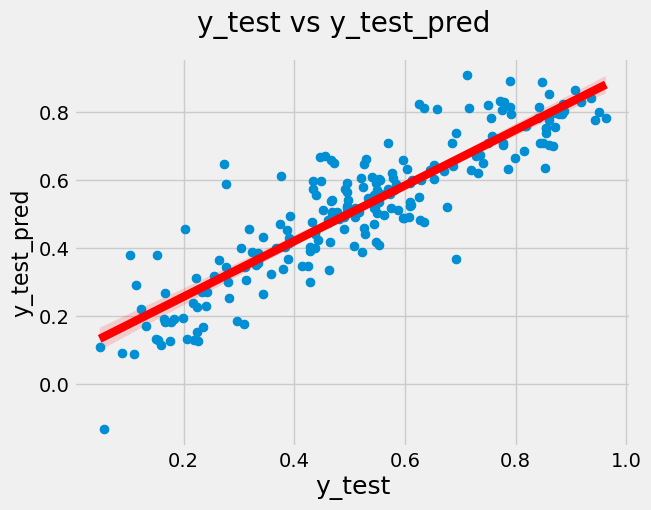

In [449]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test,y=y_test_pred, fit_reg=True, line_kws={"color":"Red"})
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

**From above plot we can observe a good linear relation between y_test and y_tes_pred**

## Comparision between parameters of Train and Test dataset:

- Train dataset R2          : 0.834
- Test dataset R2           : 0.793
- Train dataset Adjusted R2 : 0.831    
- Test dataset Adjusted R2  : 0.783

##  Equation of Best fit

**Equation of our best fitted line is:**

cnt = 0.1312 + 0.2325 * yr - 0.0971 * holiday + 0.5174 * temp - 0.1497 * windspeed + 0.1 * season_2_summer + 0.1383 * season_4_winter - 0.0825 * weather_2_mist - 0.2828 * weather_3_lightsnow + 0.0542 * month_8 + 0.1162 * month_9

## Observations

**count of total rental bikes is possitively related to:** 
   1. year
   2. temperature
   3. season_2_summer
   4. season_4_winter
   5. month_8/august
   6. month_9/september
    
**count of total rental bikes is negatively related to:**
   1. holiday
   2. windspeed
   3. weather_2_mist/Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   4. weather_3_lightsnow/Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## Interpretation of Results:

1. The demand of shared  bikes is highly influenced by temperature, and is a very important factor in demand dynamics of shared bikes. The supply of bikes should be kept more during higher temperatures to cater the higher demand and thereby increasing revenue.
2. The demand of shared bikes is expected to be more in summers and winters and these seasons should be targeted while building business strategy.
3. The demand of shared bikes is expected to be more in august and september and these months should also be targeted while building business strategy.
4. The demand of shared bikes is inversely related to holidays and hence non-holidays should be targeted in business strategy
5. The demand of shared bikes is predicted to be less during higher windspeeds . Hence at low windspeeds supply should be kept higher in order to generate more revenue.
6. The demand of shared bikes is predicted to be low in misty and light snow/rain weather conditions and thus supply should be kept lower in such weather conditions.
7. The demand of bikes is expected to be more in 2019 as compared to 2018.